In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_csv("epl_final.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9380 entries, 0 to 9379
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Season             9380 non-null   object
 1   MatchDate          9380 non-null   object
 2   HomeTeam           9380 non-null   object
 3   AwayTeam           9380 non-null   object
 4   FullTimeHomeGoals  9380 non-null   int64 
 5   FullTimeAwayGoals  9380 non-null   int64 
 6   FullTimeResult     9380 non-null   object
 7   HalfTimeHomeGoals  9380 non-null   int64 
 8   HalfTimeAwayGoals  9380 non-null   int64 
 9   HalfTimeResult     9380 non-null   object
 10  HomeShots          9380 non-null   int64 
 11  AwayShots          9380 non-null   int64 
 12  HomeShotsOnTarget  9380 non-null   int64 
 13  AwayShotsOnTarget  9380 non-null   int64 
 14  HomeCorners        9380 non-null   int64 
 15  AwayCorners        9380 non-null   int64 
 16  HomeFouls          9380 non-null   int64 


In [63]:
df.head()

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


In [64]:
df["HomeTeam"].nunique()

46

In [65]:
df_copy = df.copy()

# Add result indicators
df_copy["HomeWin"] = df_copy["FullTimeResult"] == "H"
df_copy["AwayWin"] = df_copy["FullTimeResult"] == "A"
df_copy["Draw"] = df_copy["FullTimeResult"] == "D"

# Group by team
home_stats = df_copy.groupby("HomeTeam")[["HomeWin", "Draw"]].sum()
away_stats = df_copy.groupby("AwayTeam")[["AwayWin", "Draw"]].sum()

# Rename columns
home_stats.columns = ["HomeWins", "HomeDraws"]
away_stats.columns = ["AwayWins", "AwayDraws"]

# Combine into one DataFrame
team_performance = pd.concat([home_stats, away_stats], axis=1).fillna(0)

# Sort by home wins for display
team_performance.sort_values("HomeWins", ascending=False).head(10)


,HomeWins,HomeDraws,AwayWins,AwayDraws
Man United,318,82,234,115
Arsenal,314,97,220,119
Liverpool,307,110,223,113
Chelsea,299,110,234,105
Man City,293,72,207,98
Tottenham,275,89,165,117
Everton,223,119,125,142
Newcastle,204,105,111,107
West Ham,170,105,102,103
Aston Villa,165,119,114,112


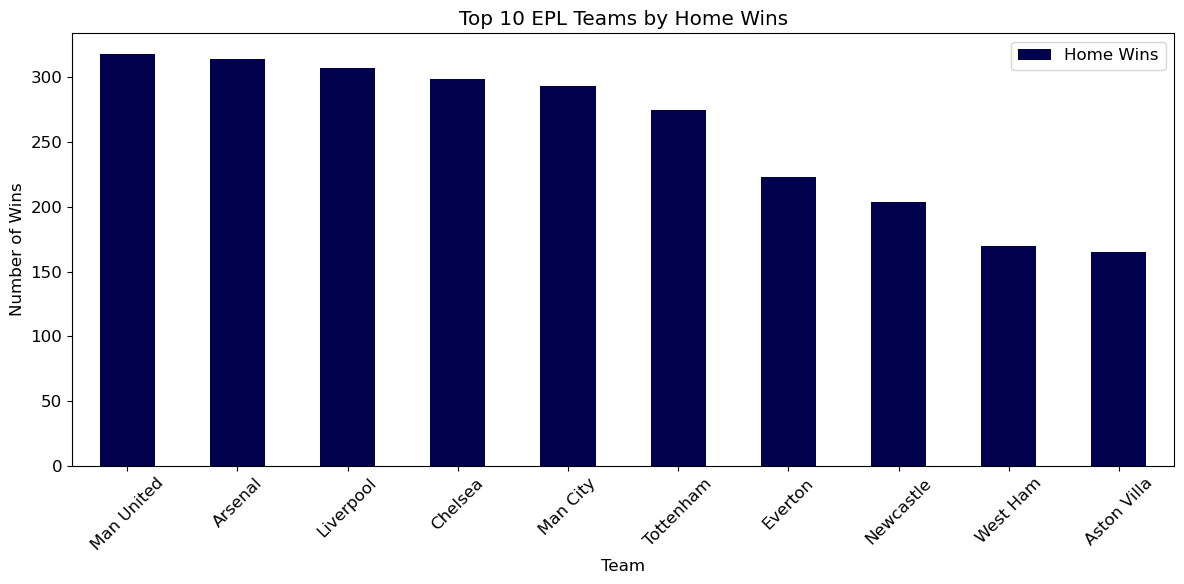

In [66]:
# Top 10 teams by Home Wins
top_10_by_home_wins = team_performance.sort_values("HomeWins", ascending=False).head(10)

# Plot Home Wins for those teams
top_10_by_home_wins[["HomeWins"]].plot(kind="bar", figsize=(12, 6), colormap="seismic")
plt.title("Top 10 EPL Teams by Home Wins")
plt.ylabel("Number of Wins")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.legend(["Home Wins"])
plt.tight_layout()
plt.show()

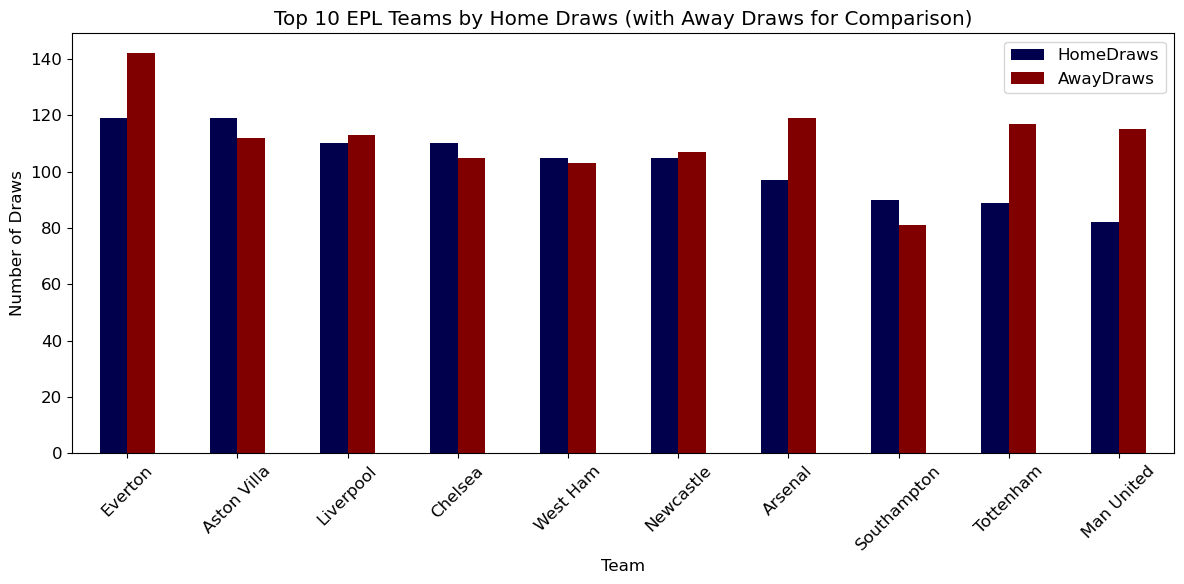

In [67]:
# Top 10 teams by Home Draws
top_10_by_home_draws = team_performance.sort_values("HomeDraws", ascending=False).head(10)

# Plot Away vs. Home Draws for those teams
top_10_by_home_draws[["HomeDraws", "AwayDraws"]].plot(
    kind="bar", figsize=(12, 6), colormap="seismic"
)
plt.title("Top 10 EPL Teams by Home Draws (with Away Draws for Comparison)")
plt.ylabel("Number of Draws")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.legend(["HomeDraws", "AwayDraws"])
plt.tight_layout()
plt.show()

In [68]:
# Add result indicators
df_copy["AwayLoss"] = df_copy["FullTimeResult"] == "H"
df_copy["HomeLoss"] = df_copy["FullTimeResult"] == "A"

# Group by team
away_stats = df_copy.groupby("AwayTeam")[["AwayLoss"]].sum()
home_stats = df_copy.groupby("HomeTeam")[["HomeLoss"]].sum()

# Rename columns
away_stats.columns = ["AwayLoss"]
home_stats.columns = ["HomeLoss"]

# Combine into one DataFrame
team_performance_l = pd.concat([home_stats, away_stats], axis=1).fillna(0)

# Sort by home loos for display
team_performance_l.sort_values("HomeLoss", ascending=False).head(10)

,HomeLoss,AwayLoss
West Ham,142,211
Everton,129,200
Aston Villa,128,187
Newcastle,121,213
Fulham,118,177
Southampton,115,162
Sunderland,110,156
Tottenham,105,187
West Brom,104,132
Crystal Palace,101,113


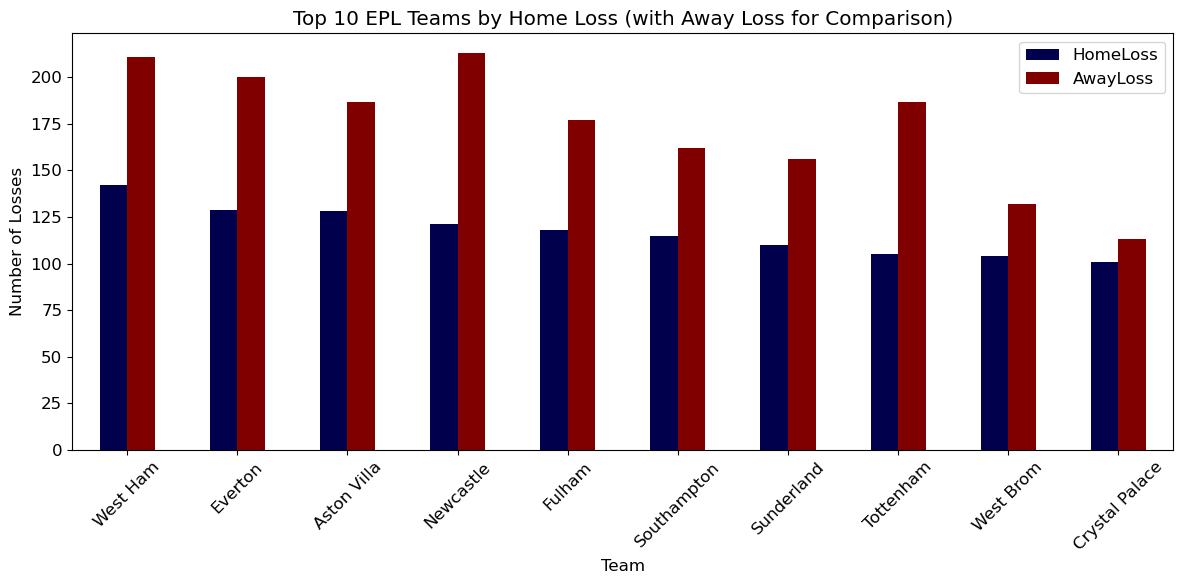

In [69]:
# Top 10 teams by Home Loss
top_10_by_home_loss = team_performance_l.sort_values("HomeLoss", ascending=False).head(10)

# Plot Away vs. Home Loss for those teams
top_10_by_home_loss[["HomeLoss", "AwayLoss"]].plot(
    kind="bar", figsize=(12, 6), colormap="seismic"
)
plt.title("Top 10 EPL Teams by Home Loss (with Away Loss for Comparison)")
plt.ylabel("Number of Losses")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.legend(["HomeLoss", "AwayLoss"])
plt.tight_layout()
plt.show()

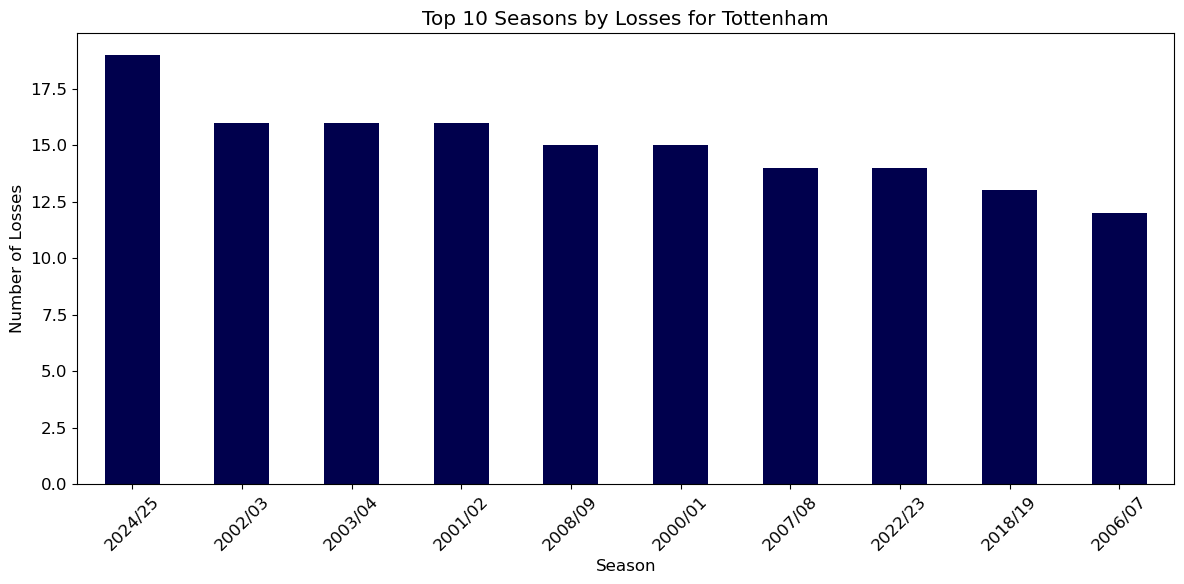

In [70]:
team_name = "Tottenham"

df_copy["TeamLoss"] = (
    ((df_copy["HomeTeam"] == team_name) & (df_copy["FullTimeResult"] == "A"))
    | ((df_copy["AwayTeam"] == team_name) & (df_copy["FullTimeResult"] == "H"))
).astype(int)

# Group by season and count losses
team_losses_by_season = (
    df_copy.groupby("Season")["TeamLoss"].sum().sort_values(ascending=False)
)

team_losses_by_season.head(10).plot(kind="bar", figsize=(12, 6), colormap="seismic")

plt.title("Top 10 Seasons by Losses for Tottenham")
plt.ylabel("Number of Losses")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [71]:
# Average goals scored at home and away by each team
home_goals = (
    df_copy.groupby("HomeTeam")["FullTimeHomeGoals"].mean().rename("AvgHomeGoals")
)
away_goals = (
    df_copy.groupby("AwayTeam")["FullTimeAwayGoals"].mean().rename("AvgAwayGoals")
)

# Combine
avg_goals = pd.concat([home_goals, away_goals], axis=1).fillna(0)

# Sort by AvgHomeGoals
avg_goals_sorted = avg_goals.sort_values("AvgHomeGoals", ascending=False)
avg_goals_sorted.head(10)

,AvgHomeGoals,AvgAwayGoals
Man City,2.186667,1.633333
Arsenal,2.147436,1.648188
Liverpool,2.081370,1.645435
Chelsea,2.057569,1.572650
Man United,2.040512,1.592751
Tottenham,1.835821,1.407249
Brentford,1.653333,1.351351
Blackpool,1.578947,1.315789
Newcastle,1.565116,1.111369
Everton,1.511677,1.049251


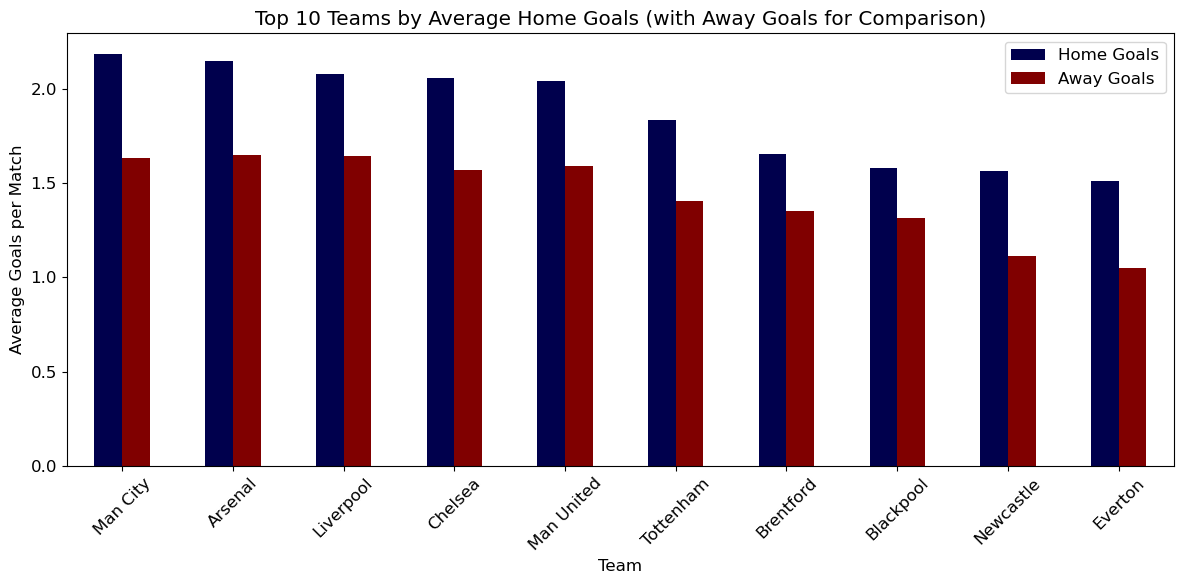

In [72]:
# Top 10 teams by average home goals
top_10_avg_goals = avg_goals.sort_values("AvgHomeGoals", ascending=False).head(10)

# Plot
top_10_avg_goals.plot(kind="bar", figsize=(12, 6), colormap="seismic")
plt.title("Top 10 Teams by Average Home Goals (with Away Goals for Comparison)")
plt.ylabel("Average Goals per Match")
plt.xlabel("Team")
plt.xticks(rotation=45)
plt.legend(["Home Goals", "Away Goals"])
plt.tight_layout()
plt.show()

-Home Advantage is Clear:
Teams across the league consistently win more matches and score more goals when playing at home, highlighting a strong home-field advantage.

-Dominant Home Teams:
The most consistently dominant teams at home are Manchester United, Arsenal, Liverpool, Chelsea, and Manchester City — all topping the charts in both home wins and average home goals.

-Inconsistent but High-Impact Teams:
Tottenham and Everton exhibit high variability in their home performances.
They appear in the top rankings for home wins, draws, losses, and even home goals scored — suggesting they can be both highly effective and unpredictable.

In [73]:
df.head()

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,14,4,6,6,13,12,1,2,0,0
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,10,5,7,7,19,14,1,2,0,0
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,3,9,8,4,15,21,5,3,1,0
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,4,6,5,8,11,13,1,1,0,0
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,8,6,6,4,21,20,1,3,0,0


In [74]:
# 2. Does a Halftime Lead Translate to Full-Time Victory?
df_copy = df.copy()
halftime_leads = df_copy[df_copy["HalfTimeResult"].isin(["H", "A"])]

lead_held = (
    (
        (halftime_leads["HalfTimeResult"] == "H")
        & (halftime_leads["FullTimeResult"] == "H")
    )
    | (
        (halftime_leads["HalfTimeResult"] == "L")
        & (halftime_leads["FullTimeResult"] == "L")
    )
).sum()

total_halftime_leads = len(halftime_leads)

conversion_rate = lead_held / total_halftime_leads * 100
print(
    f"Percentage of halftime leads that turn into full-time wins: {conversion_rate:.2f}%"
)

Percentage of halftime leads that turn into full-time wins: 47.62%


In [75]:
team_analysis = halftime_leads.copy()
team_analysis["LeadHeld"] = (
    (
        (team_analysis["HalfTimeResult"] == "H")
        & (team_analysis["FullTimeResult"] == "H")
    )
    | (
        (team_analysis["HalfTimeResult"] == "A")
        & (team_analysis["FullTimeResult"] == "A")
    )
).astype(int)

team_analysis["LeadingTeam"] = team_analysis.apply(
    lambda row: row["HomeTeam"] if row["HalfTimeResult"] == "H" else row["AwayTeam"],
    axis=1,
)

team_conversion = team_analysis.groupby("LeadingTeam")["LeadHeld"].agg(["sum", "count"])
team_conversion["ConversionRate"] = (
    team_conversion["sum"] / team_conversion["count"] * 100
)

print(team_conversion.sort_values("ConversionRate", ascending=False).head(10))

             sum  count  ConversionRate
LeadingTeam                            
Liverpool    341    390       87.435897
Man United   360    412       87.378641
Man City     340    396       85.858586
Arsenal      325    385       84.415584
Chelsea      342    410       83.414634
Tottenham    253    322       78.571429
Birmingham    46     60       76.666667
Charlton      53     70       75.714286
Leeds         53     70       75.714286
Leicester     93    123       75.609756


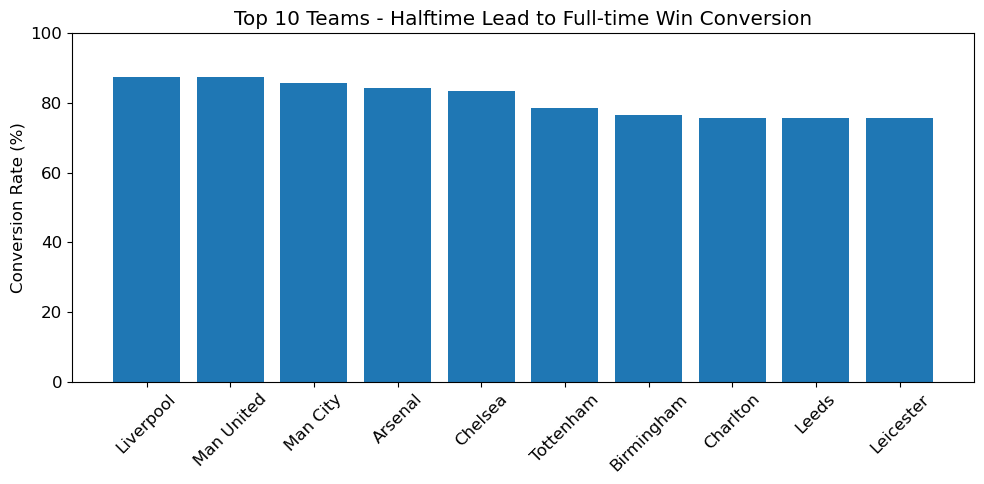

In [76]:
# Top 10 teams
top_10 = team_conversion.sort_values("ConversionRate", ascending=False).head(10)

# Plot top 10
plt.figure(figsize=(10, 5))
plt.bar(top_10.index, top_10["ConversionRate"])
plt.title("Top 10 Teams - Halftime Lead to Full-time Win Conversion")
plt.ylabel("Conversion Rate (%)")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

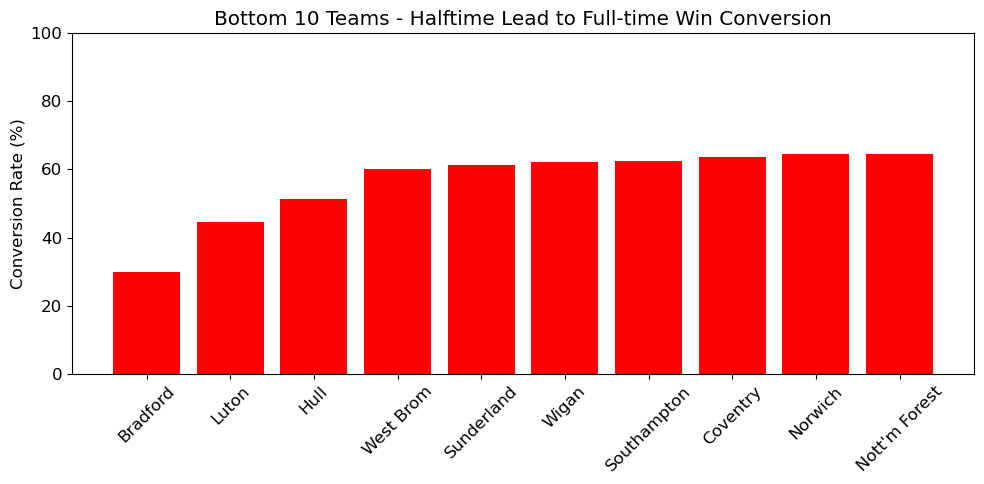

In [77]:
# Bottom 10 teams
bottom_10 = team_conversion.sort_values("ConversionRate", ascending=True).head(10)

# Plot bottom 10
plt.figure(figsize=(10, 5))
plt.bar(bottom_10.index, bottom_10["ConversionRate"], color="red")
plt.title("Bottom 10 Teams - Halftime Lead to Full-time Win Conversion")
plt.ylabel("Conversion Rate (%)")
plt.ylim(0, 100)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [78]:
# Create a column for whether the team came back from behind
team_analysis["ComebackWin"] = (
    (
        (team_analysis["HalfTimeResult"] == "A")
        & (team_analysis["FullTimeResult"] == "H")
    )
    | (
        (team_analysis["HalfTimeResult"] == "H")
        & (team_analysis["FullTimeResult"] == "A")
    )
).astype(int)

# Ratio of comebacks to happens
prob_remontada = (team_analysis["ComebackWin"].sum() / len(team_analysis)) * 100
print(f"propability of seeing a remontada: {prob_remontada}")

propability of seeing a remontada: 7.509025270758123


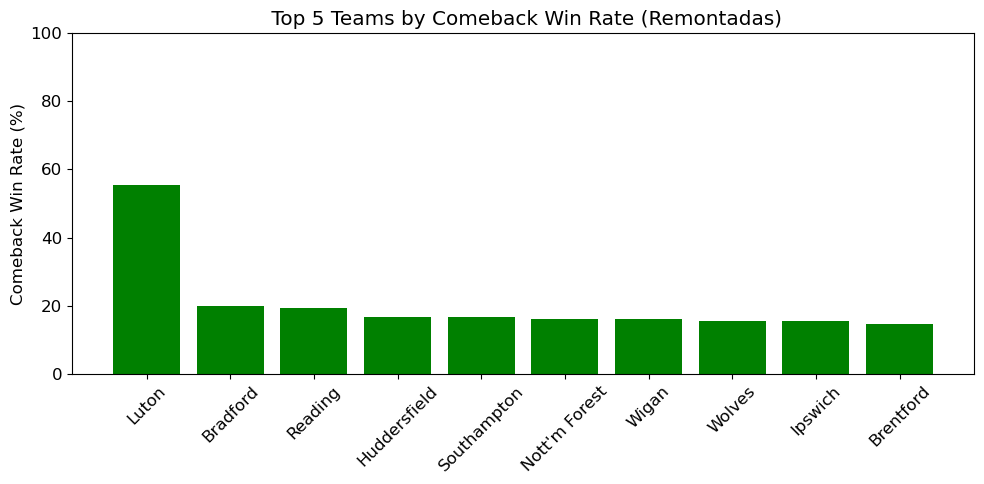

In [79]:
# Group by the leading team and count comeback wins
remontada_stats = team_analysis.groupby("LeadingTeam")["ComebackWin"].agg(
    ["sum", "count"]
)
remontada_stats = remontada_stats.rename(
    columns={"sum": "ComebackWins", "count": "TotalOpportunities"}
)
remontada_stats["RemontadaRate"] = (
    remontada_stats["ComebackWins"] / remontada_stats["TotalOpportunities"]
) * 100

# Top 5 comeback teams
top_remontadas = remontada_stats.sort_values("RemontadaRate", ascending=False).head(10)

# Plot top 5
plt.figure(figsize=(10, 5))
plt.bar(top_remontadas.index, top_remontadas["RemontadaRate"], color="green")
plt.title(" Top 5 Teams by Comeback Win Rate (Remontadas)")
plt.ylabel("Comeback Win Rate (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

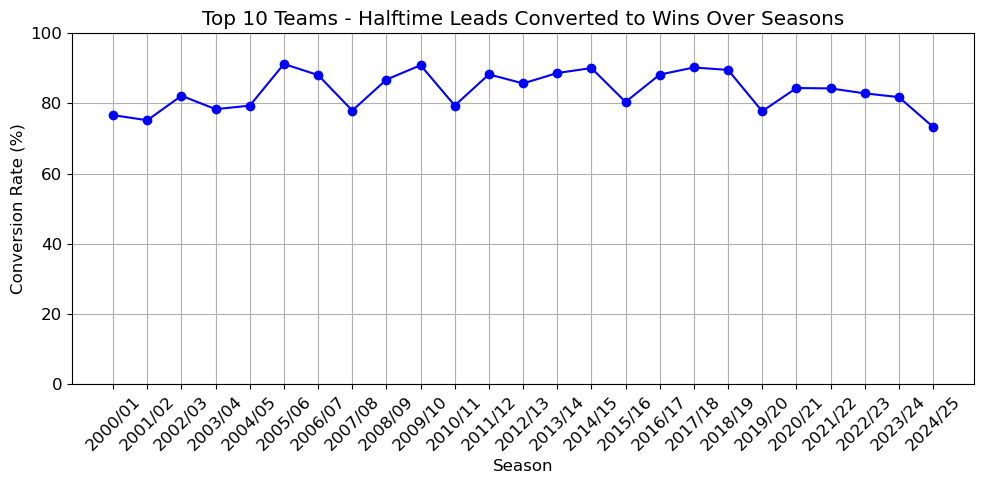

In [80]:
# top 10 teams based on overall halftime lead conversion
top_10_teams = top_10.index.tolist() 
top_10_matches = team_analysis[team_analysis["LeadingTeam"].isin(top_10_teams)]

# Now group by Season and calculate lead conversion stats
season_conversion = top_10_matches.groupby("Season")["LeadHeld"].agg(["sum", "count"])
season_conversion["ConversionRate"] = (
    season_conversion["sum"] / season_conversion["count"]
) * 100

plt.figure(figsize=(10, 5))
plt.plot(
    season_conversion.index,
    season_conversion["ConversionRate"],
    marker="o",
    color="blue",
)

plt.title("Top 10 Teams - Halftime Leads Converted to Wins Over Seasons")
plt.ylabel("Conversion Rate (%)")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()

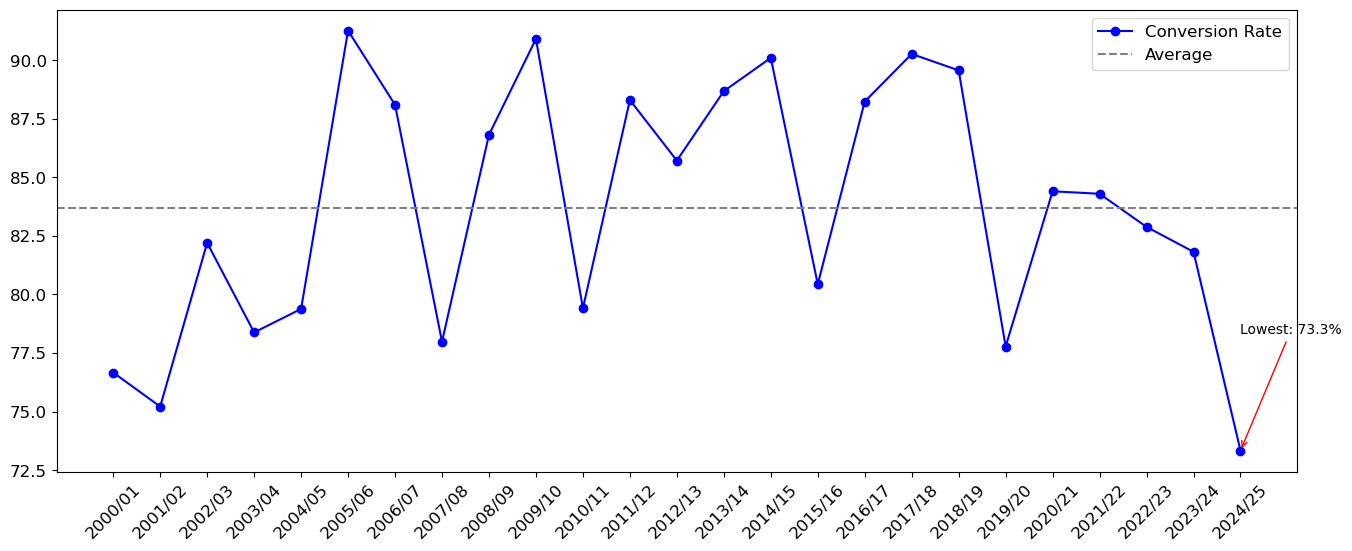

In [81]:
plt.rcParams.update({"font.size": 12})
plt.figure(figsize=(16, 6))
plt.xticks(rotation=45)
plt.plot(
    season_conversion.index,
    season_conversion["ConversionRate"],
    marker="o",
    color="blue",
    label="Conversion Rate"
)
plt.axhline(
    season_conversion["ConversionRate"].mean(),
    color="gray",
    linestyle="--",
    label="Average",
)

# Annotate lowest point
min_season = season_conversion["ConversionRate"].idxmin()
min_val = season_conversion["ConversionRate"].min()
plt.annotate(
    f"Lowest: {min_val:.1f}%",
    xy=(min_season, min_val),
    xytext=(min_season, min_val + 5),
    arrowprops=dict(arrowstyle="->", color="red"),
    fontsize=10
)
plt.legend()

- Halftime Conversion Is Declining Among Top Teams:
While the historically dominant teams still lead the league in converting halftime leads into wins, their performance has dropped over the past six seasons. The most recent season marked the lowest conversion rate on record for these clubs, reflecting a potential shift in competitiveness or tactical control.

- Strong Halftime Conversion = Title Contenders:
The top six teams in overall win conversion are the same as those with the highest halftime lead conversion — underlining that championship-caliber teams protect early advantages with discipline and structure.

- Low Conversion Predicts Relegation:
All of the bottom 10 teams in halftime conversion have faced relegation at some point, showing that failing to hold a lead is a key indicator of poor team resilience and long-term decline.

- Comebacks Are Rare and Defined by Smaller Clubs:
The probability of a remontada (comeback win from a halftime deficit) is very low across the league. Yet, all of the top 10 teams in comeback wins are considered small clubs. These teams rarely dominate but show high fighting spirit and mental resilience, often punching above their weight when trailing.

- Big Clubs Rarely Trail — But Rarely Come Back:
Dominant teams have few opportunities to stage comebacks because they often lead early. However, when trailing, they seldom recover — suggesting their dominance depends heavily on early control, not late-game explosiveness.

- Most Halftime Leads Result in Wins — But Just Barely:
Across all teams, only 47.62% of halftime leads result in full-time wins, showing that holding a lead remains a tactical challenge, especially for less structured squads.

- Resilience ≠ Success:
Comeback success doesn’t translate into high league standing. The most resilient teams in terms of remontadas still don’t rank in the top 10 for total wins, proving that resilience and dominance are separate traits in football performance.

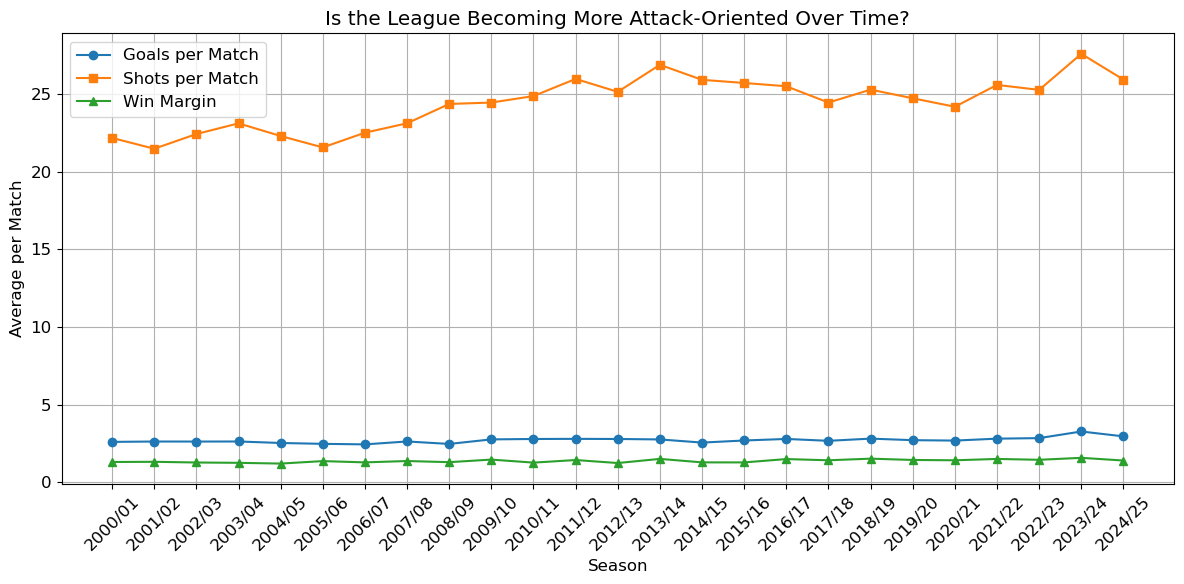

In [82]:
# 3. Is the League Becoming More Attack-Oriented Over Time?
df_copy = df.copy() 

# Calculate match-level features
df_copy["TotalGoals"] = df_copy["FullTimeHomeGoals"] + df_copy["FullTimeAwayGoals"]
df_copy["TotalShots"] = df_copy["HomeShots"] + df_copy["AwayShots"]
df_copy["WinMargin"] = abs(df_copy["FullTimeHomeGoals"] - df_copy["FullTimeAwayGoals"])

# Step 2: Group by Season and calculate average
attack_trend = df_copy.groupby("Season")[
    ["TotalGoals", "TotalShots", "WinMargin"]
].mean()
attack_trend = attack_trend.sort_index()

plt.figure(figsize=(12, 6))

# Goals trend
plt.plot(
    attack_trend.index, attack_trend["TotalGoals"], marker="o", label="Goals per Match"
)

# Shots trend
plt.plot(
    attack_trend.index, attack_trend["TotalShots"], marker="s", label="Shots per Match"
)

# Win Margin trend
plt.plot(attack_trend.index, attack_trend["WinMargin"], marker="^", label="Win Margin")

plt.title("Is the League Becoming More Attack-Oriented Over Time?")
plt.xlabel("Season")
plt.ylabel("Average per Match")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

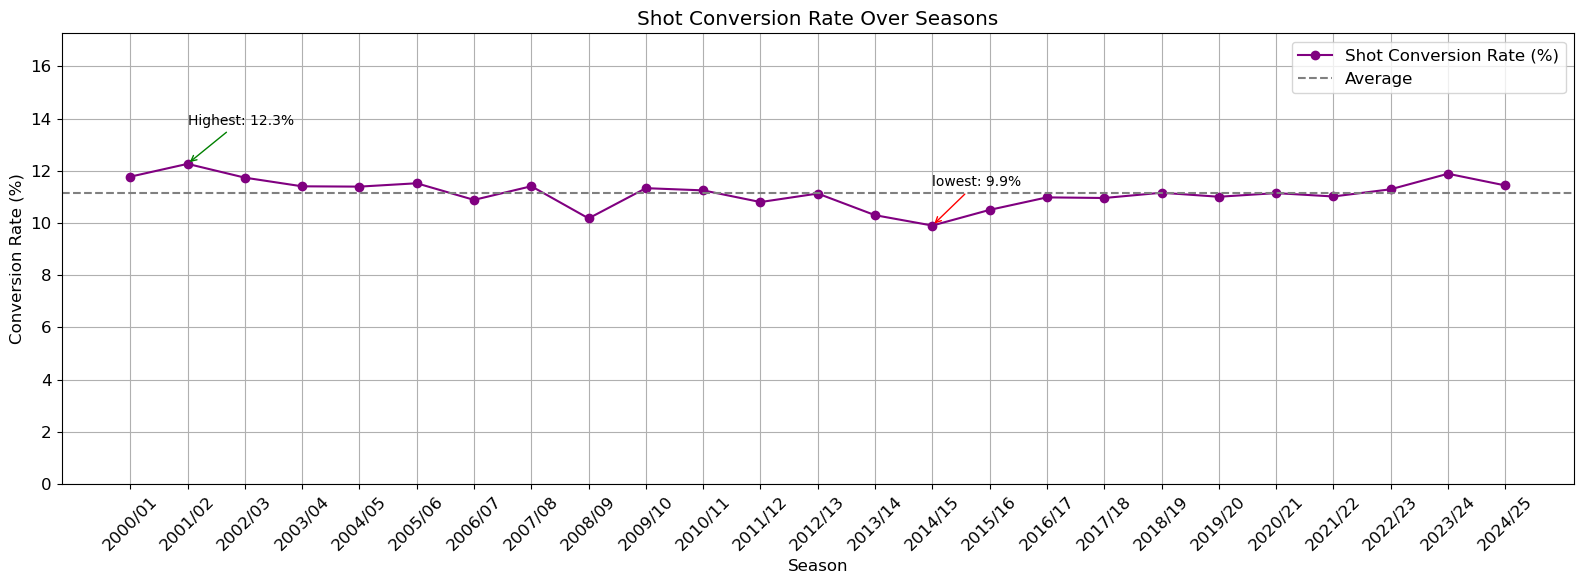

In [83]:
# Calculate shot conversion rate (%)
attack_trend["ShotConversion"] = (
    attack_trend["TotalGoals"] / attack_trend["TotalShots"]
) * 100

plt.figure(figsize=(16, 6))
plt.plot(
    attack_trend.index,
    attack_trend["ShotConversion"],
    marker="o",
    color="purple",
    label="Shot Conversion Rate (%)",
)

plt.axhline(
    attack_trend["ShotConversion"].mean(), color="gray", linestyle="--", label="Average"
)

max_season = attack_trend["ShotConversion"].idxmax()
max_val = attack_trend["ShotConversion"].max()

min_season = attack_trend["ShotConversion"].idxmin()
min_val = attack_trend["ShotConversion"].min()

plt.annotate(
    f"Highest: {max_val:.1f}%",
    xy=(max_season, max_val),
    xytext=(max_season, max_val + 1.5),
    arrowprops=dict(arrowstyle="->", color="green"),
    fontsize=10,
)

plt.annotate(
    f"lowest: {min_val:.1f}%",
    xy=(min_season, min_val),
    xytext=(min_season, min_val + 1.5),
    arrowprops=dict(arrowstyle="->", color="red"),
    fontsize=10,
)

# Final plot settings
plt.title("Shot Conversion Rate Over Seasons")
plt.ylabel("Conversion Rate (%)")
plt.xlabel("Season")
plt.xticks(rotation=45)
plt.ylim(0, attack_trend["ShotConversion"].max() + 5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

- Teams Are Taking More Shots, But Goals and Win Margins Stay Flat:
Over the years, teams have steadily increased their shots per match, signaling a more attack-oriented style. However, both goals per match and win margins have remained nearly constant, indicating that increased offensive efforts have not led to more scoring or more decisive victories.

- Shot Conversion Rate Remains Stable Around 11%:
Despite fluctuations, shot conversion rates have hovered close to an 11% average over two decades, with a low of 9.9% in 2014–15 and a peak of 12.3% in 2001–02. The slight rise in the last three seasons is marginal, suggesting no significant improvement in finishing efficiency.

- Defenses and Goalkeepers Are Keeping Pace:
The disconnect between rising shot volume and stable goals suggests that defensive organization and goalkeeping quality have improved to offset increased attacking pressure.

- Tactical Evolution Focuses on Quantity Over Quality:
Teams appear to favor more shot attempts rather than higher-quality chances, possibly reflecting tactical changes that emphasize pressing and creating shooting opportunities even from low-probability positions.

- Competitive Balance Maintained Through Stable Win Margins:
The near-constant win margins suggest matches remain tightly contested, with no clear trend toward dominance or imbalance, despite growing offensive attempts.

- Modern Football Is More Dynamic But Not Necessarily More Efficient:
Overall, the game has evolved to be more aggressive and shot-heavy, but this has not translated into increased scoring effectiveness or greater match control.


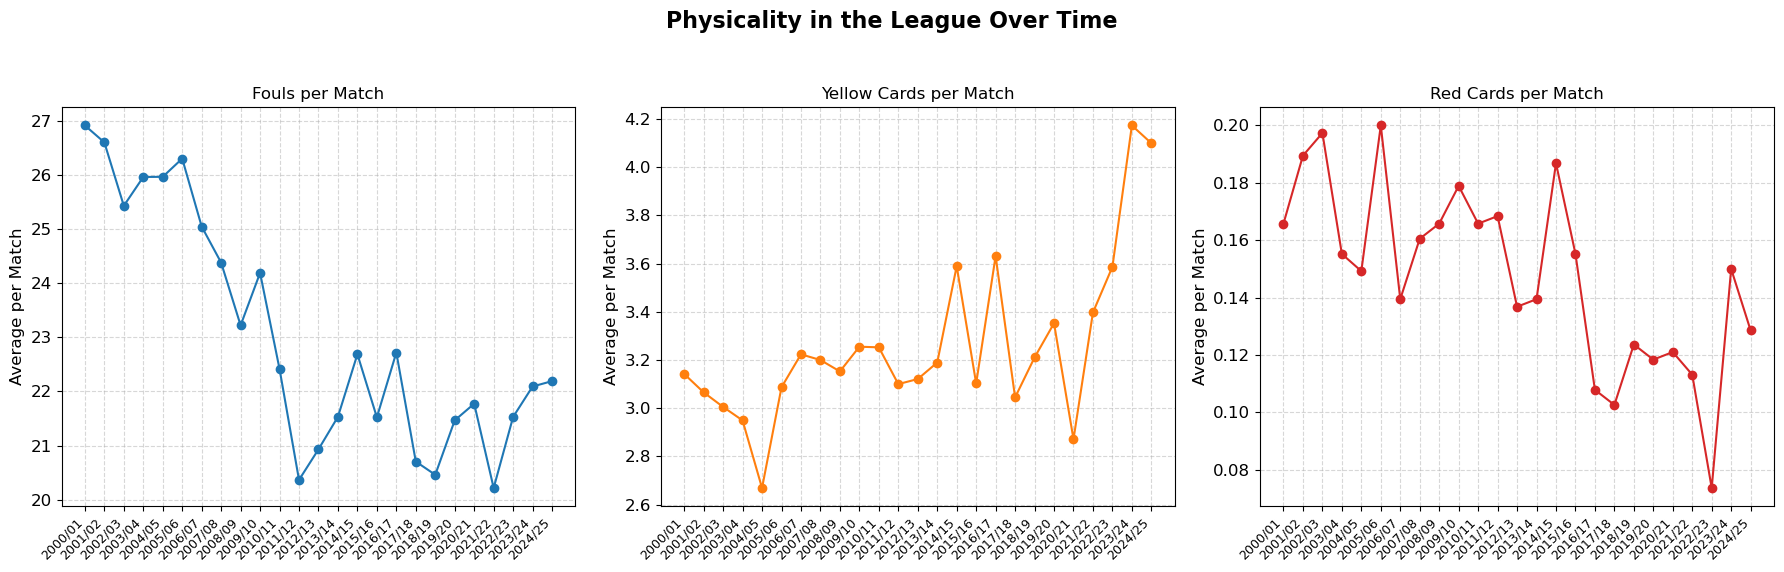

In [84]:
# 4. Are matches becoming more physical, as measured by fouls and cards?
df_copy = df.copy()

df_copy["TotalFouls"] = df_copy["HomeFouls"] + df_copy["AwayFouls"]
df_copy["TotalYellowCards"] = df_copy["HomeYellowCards"] + df_copy["AwayYellowCards"]
df_copy["TotalRedCards"] = df_copy["HomeRedCards"] + df_copy["AwayRedCards"]

physical_trends = df_copy.groupby("Season")[
    ["TotalFouls", "TotalYellowCards", "TotalRedCards"]
].mean()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

metrics = ["TotalFouls", "TotalYellowCards", "TotalRedCards"]
colors = ["#1f77b4", "#ff7f0e", "#d62728"]
titles = ["Fouls per Match", "Yellow Cards per Match", "Red Cards per Match"]

for i, ax in enumerate(axes):
    ax.plot(
        physical_trends.index, physical_trends[metrics[i]], marker="o", color=colors[i]
    )
    ax.set_title(titles[i], fontsize=12)
    ax.set_ylabel("Average per Match")
    ax.grid(True, linestyle="--", alpha=0.5)
    ax.set_xticks(range(len(physical_trends.index)))
    ax.set_xticklabels(physical_trends.index, rotation=45, ha="right", fontsize=9)

fig.suptitle("Physicality in the League Over Time", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [85]:
# Home discipline
home_cards = df_copy.groupby("HomeTeam").agg(
    HomeYellows=("HomeYellowCards", "sum"),
    HomeReds=("HomeRedCards", "sum"),
    HomeFouls=("HomeFouls", "sum"),
    HomeGames=("HomeTeam", "count"),
)

# Away discipline
away_cards = df_copy.groupby("AwayTeam").agg(
    AwayYellows=("AwayYellowCards", "sum"),
    AwayReds=("AwayRedCards", "sum"),
    AwayFouls=("AwayFouls", "sum"),
    AwayGames=("AwayTeam", "count"),
)
discipline = home_cards.join(away_cards, how="inner")
discipline.index.name = "Team"

# Total cards and rates
discipline["Cards_Home"] = discipline["HomeYellows"] + discipline["HomeReds"]
discipline["Cards_Away"] = discipline["AwayYellows"] + discipline["AwayReds"]

discipline["CardsPerGame_Home"] = discipline["Cards_Home"] / discipline["HomeGames"]
discipline["CardsPerGame_Away"] = discipline["Cards_Away"] / discipline["AwayGames"]

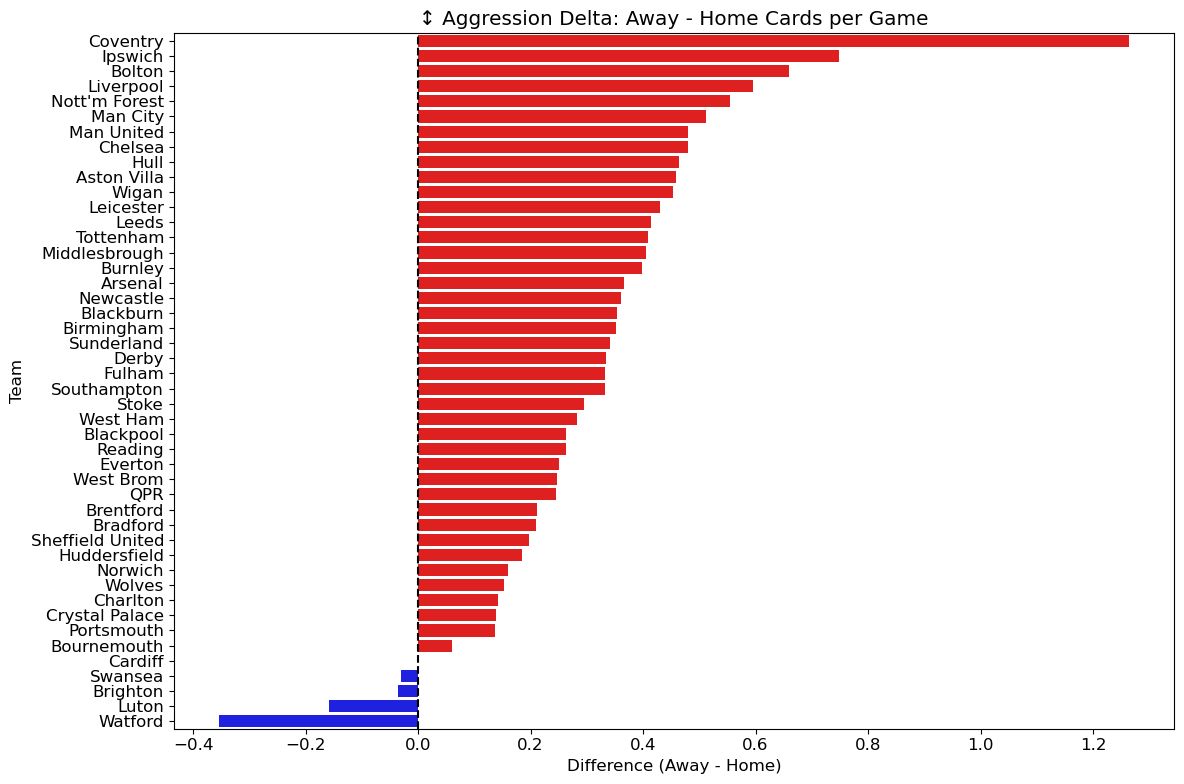

In [86]:
# Compute delta again
discipline["AggressionDelta"] = (
    discipline["CardsPerGame_Away"] - discipline["CardsPerGame_Home"]
)
delta_sorted = discipline.sort_values("AggressionDelta", ascending=False)

plt.figure(figsize=(12, 8))
colors = delta_sorted["AggressionDelta"].apply(lambda x: "red" if x > 0 else "blue")

sns.barplot(x=delta_sorted["AggressionDelta"], y=delta_sorted.index, palette=colors)

plt.axvline(0, color="black", linestyle="--")
plt.title("↕️ Aggression Delta: Away - Home Cards per Game")
plt.xlabel("Difference (Away - Home)")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

In [87]:
df_reds = df.copy()

# Flags
df_reds["HomeRed"] = df_reds["HomeRedCards"] > 0
df_reds["AwayRed"] = df_reds["AwayRedCards"] > 0

# Who got the red card
df_reds["RedCardTeam"] = df_reds.apply(
    lambda row: (
        "Home Team" if row["HomeRed"] else "Away Team" if row["AwayRed"] else "No Red"
    ),
    axis=1,
)


# Final outcome for the red card team
def red_card_outcome(row):
    if row["RedCardTeam"] == "Home Team":
        if row["FullTimeResult"] == "H":
            return "Win"
        elif row["FullTimeResult"] == "D":
            return "Draw"
        else:
            return "Loss"
    elif row["RedCardTeam"] == "Away Team":
        if row["FullTimeResult"] == "A":
            return "Win"
        elif row["FullTimeResult"] == "D":
            return "Draw"
        else:
            return "Loss"
    else:
        return None


df_reds["RedCardOutcome"] = df_reds.apply(red_card_outcome, axis=1)

# Filter only matches with red cards
df_with_red = df_reds[df_reds["RedCardTeam"] != "No Red"]

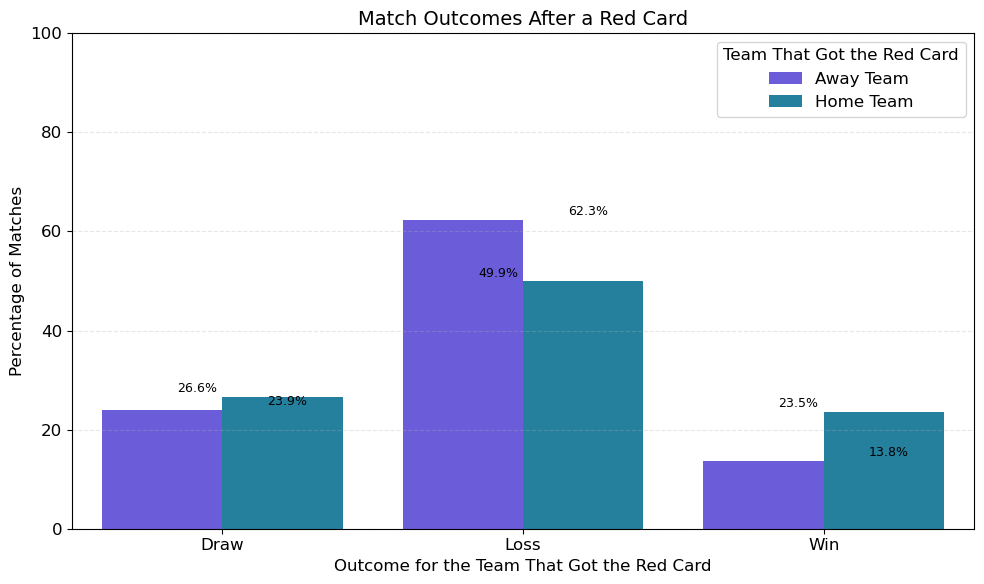

In [88]:
# Add percent for each red card team category
summary = (
    df_with_red.groupby(["RedCardTeam", "RedCardOutcome"])
    .size()
    .reset_index(name="MatchCount")
)

summary["Percentage"] = (
    summary["MatchCount"]
    / summary.groupby("RedCardTeam")["MatchCount"].transform("sum")
    * 100
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=summary,
    x="RedCardOutcome",
    y="Percentage",
    hue="RedCardTeam",
    palette=["#5B47EF", "#118AB2"],
)

plt.title("Match Outcomes After a Red Card", fontsize=14)
plt.ylabel("Percentage of Matches")
plt.xlabel("Outcome for the Team That Got the Red Card")
plt.ylim(0, 100)
plt.legend(title="Team That Got the Red Card")
plt.grid(axis="y", linestyle="--", alpha=0.3)

# Annotate bars
for i in range(len(summary)):
    row = summary.iloc[i]
    plt.text(
        x=i % 3 - 0.15 + (0.3 if row["RedCardTeam"] == "Away Team" else 0),
        y=row["Percentage"] + 1,
        s=f"{row['Percentage']:.1f}%",
        fontsize=9,
    )

plt.tight_layout()
plt.show()

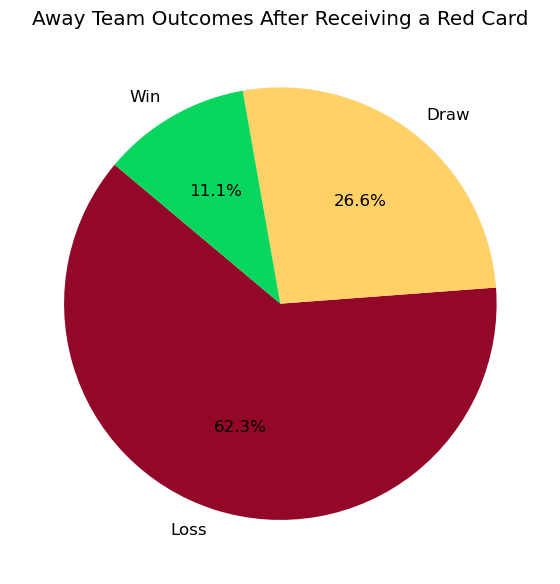

In [89]:
# Values for away red card outcome
labels = ["Loss", "Draw", "Win"]
sizes = [62.3, 26.6, 11.1]
colors = ["#930828", "#FFD166", "#06D65D"]

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=colors, startangle=140)
plt.title("Away Team Outcomes After Receiving a Red Card")
plt.tight_layout()
plt.show()

- Teams Are More Aggressive Away from Home:
The majority of teams commit more fouls and accumulate more cards in away matches compared to home fixtures. Only three teams across the dataset showed higher aggression at home. This suggests that away teams are more reactive and defensive, often resorting to fouls to contain pressure.

- Fouls Are Declining, but Cards Are Increasing:
Over the past two decades, fouls per match have steadily decreased — from averages above 27 in the early 2000s to just 22 in recent seasons. However, yellow card frequency has risen, with the last two seasons recording the highest caution rates in league history. This indicates a shift in refereeing philosophy: fewer interruptions, but stricter enforcement through bookings.

- Red Cards Are at a Historic Low:
Red card frequency has dropped significantly in recent years, reaching just 0.11 per match in the most recent season — the lowest recorded in the dataset. This trend reflects a tactical emphasis on maintaining eleven players on the pitch, combined with an officiating approach that prioritizes control over dismissal.

- The Game Is Cleaner, Yet More Controlled:
Despite the apparent reduction in physicality, matches are becoming more tightly regulated. Tactical aggression has given way to structured pressing, while referees rely on early cautions to manage intensity. This balance has reshaped the modern match environment — less chaotic, but more disciplinary in nature.

- Away Red Cards Severely Impact Results:
When the away team receives a red card, they go on to lose the match 62.3% of the time and draw 26.6% — leaving only around 11% of matches where they manage a win. This highlights how disruptive red cards are to away teams' tactical shape, with limited success in recovering under hostile conditions.


In [90]:
df_copy = df.copy()

# Add total shots faced (shots taken by opponent)
df_copy["ShotsFaced_Home"] = df_copy["AwayShots"]
df_copy["ShotsFaced_Away"] = df_copy["HomeShots"]

df_copy["GoalsConceded_Home"] = df_copy["FullTimeAwayGoals"]
df_copy["GoalsConceded_Away"] = df_copy["FullTimeHomeGoals"]

# Combine for each team
home_def = df_copy.groupby("HomeTeam")[["ShotsFaced_Home", "GoalsConceded_Home"]].sum()
away_def = df_copy.groupby("AwayTeam")[["ShotsFaced_Away", "GoalsConceded_Away"]].sum()

# Total shots faced and goals conceded
team_def = home_def.join(away_def, how="outer").fillna(0)
team_def["TotalShotsFaced"] = team_def["ShotsFaced_Home"] + team_def["ShotsFaced_Away"]
team_def["TotalGoalsConceded"] = (
    team_def["GoalsConceded_Home"] + team_def["GoalsConceded_Away"]
)
team_def["ConcededPerShot"] = (
    team_def["TotalGoalsConceded"] / team_def["TotalShotsFaced"]
)

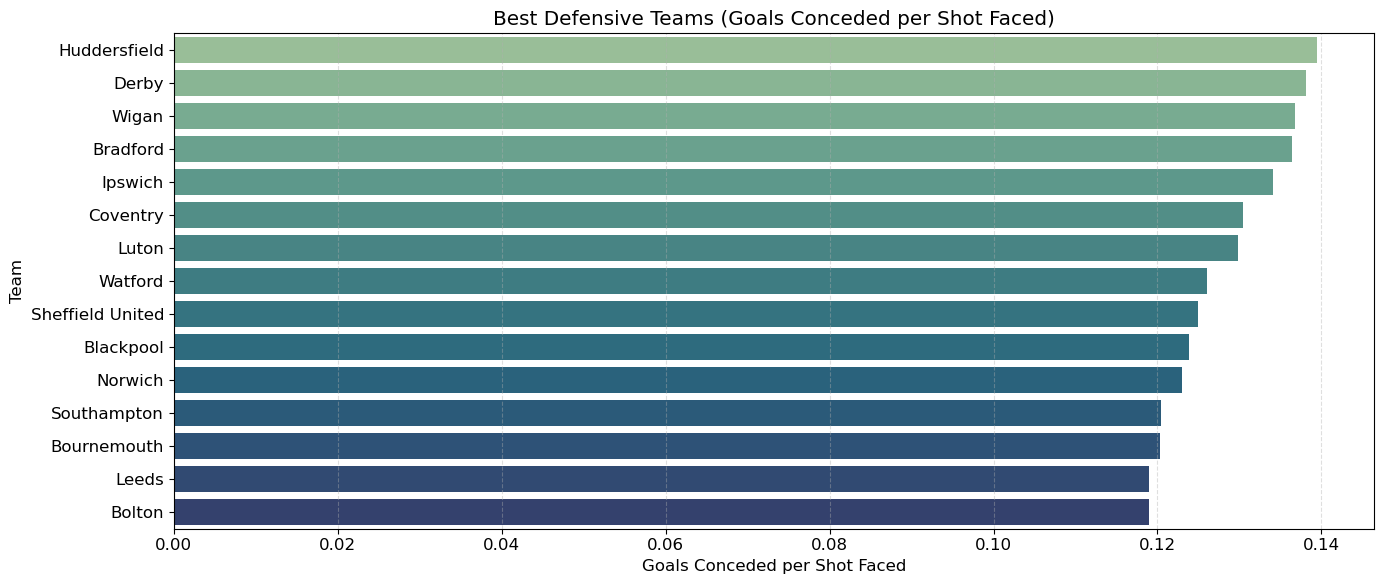

In [91]:
# Which teams are the most defensively efficient (conceding few goals per shot faced)?

defensive_ranking = team_def.sort_values("ConcededPerShot",ascending=False)

plt.figure(figsize=(14, 6))
sns.barplot(
    x=defensive_ranking["ConcededPerShot"].head(15),
    y=defensive_ranking.head(15).index,
    palette="crest",
)
plt.title("Best Defensive Teams (Goals Conceded per Shot Faced)")
plt.xlabel("Goals Conceded per Shot Faced")
plt.ylabel("Team")
plt.grid(axis="x", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

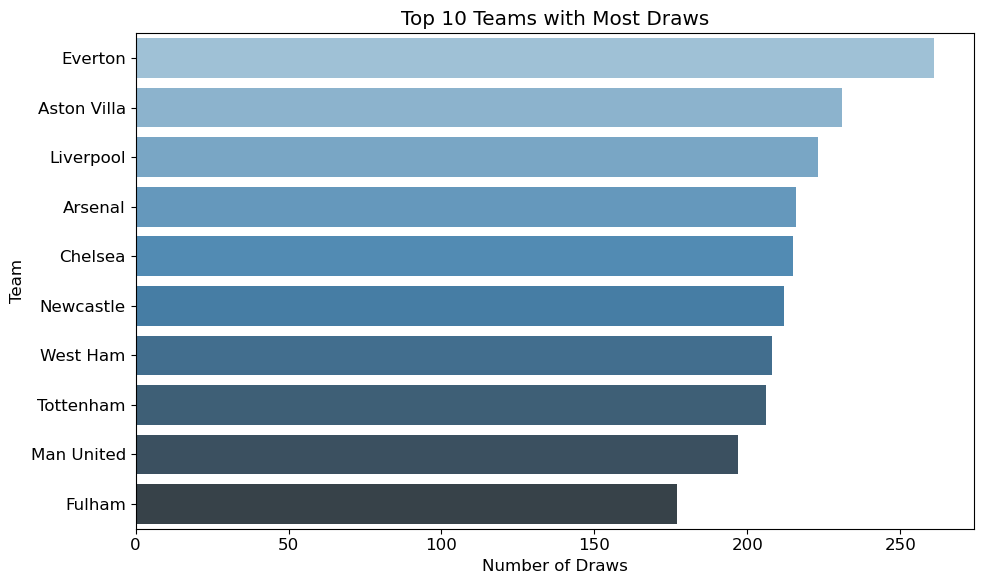

In [92]:
# Which teams draw the most matches? Are there consistent "draw kings"?

# Count draws at home and away
df_copy["IsDraw"] = df_copy["FullTimeResult"] == "D"
draws = (
    df_copy.groupby("HomeTeam")["IsDraw"].sum()
    + df_copy.groupby("AwayTeam")["IsDraw"].sum()
)
draws = draws.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=draws.head(10).values, y=draws.head(10).index, palette="Blues_d")
plt.title("Top 10 Teams with Most Draws")
plt.xlabel("Number of Draws")
plt.ylabel("Team")
plt.tight_layout()
plt.show()

- Defensive Efficiency ≠ Strong Team
Over the top 15 most defensively efficient teams are weaker or clubs that faced relegation. They face many shots but concede relatively few, likely due to deep blocks or standout keepers. However, this rarely translates to overall success. However, this typically comes with limited attacking output and a low goal-difference ratio, restricting their overall success.

- Draws Are a Top Team Strategy
Five of the top six also appear among the league’s most frequent drawers. This shows that consistent drawing, especially in tight matches, is often a tactical choice (not a weakness) for top-tier clubs.

In [93]:
# Teams Analysis
df_copy = df.copy()

# 1. Define wins
df_copy["HomeWin"] = (df_copy["FullTimeResult"] == "H").astype(int)
df_copy["AwayWin"] = (df_copy["FullTimeResult"] == "A").astype(int)

# 2. Group home stats
home_stats = df_copy.groupby("HomeTeam").agg(
    Goals_Home=("FullTimeHomeGoals", "sum"),
    Shots_Home=("HomeShots", "sum"),
    ShotsOnTarget_Home=("HomeShotsOnTarget", "sum"),
    Fouls_Home=("HomeFouls", "sum"),
    Yellow_Home=("HomeYellowCards", "sum"),
    Red_Home=("HomeRedCards", "sum"),
    Wins_Home=("HomeWin", "sum"),
    Games_Home=("HomeWin", "count"),
)

# 3. Group away stats
away_stats = df_copy.groupby("AwayTeam").agg(
    Goals_Away=("FullTimeAwayGoals", "sum"),
    Shots_Away=("AwayShots", "sum"),
    ShotsOnTarget_Away=("AwayShotsOnTarget", "sum"),
    Fouls_Away=("AwayFouls", "sum"),
    Yellow_Away=("AwayYellowCards", "sum"),
    Red_Away=("AwayRedCards", "sum"),
    Wins_Away=("AwayWin", "sum"),
    Games_Away=("AwayWin", "count"),
)

# 4. Merge and calculate totals
teamStatistics = home_stats.add(away_stats, fill_value=0)
teamStatistics.index.name = "Team"

# 5. Derived columns
teamStatistics["Goals"] = teamStatistics["Goals_Home"] + teamStatistics["Goals_Away"]
teamStatistics["Shots"] = teamStatistics["Shots_Home"] + teamStatistics["Shots_Away"]
teamStatistics["ShotsOnTarget"] = (
    teamStatistics["ShotsOnTarget_Home"] + teamStatistics["ShotsOnTarget_Away"]
)
teamStatistics["Fouls"] = teamStatistics["Fouls_Home"] + teamStatistics["Fouls_Away"]
teamStatistics["Cards"] = (
    teamStatistics["Yellow_Home"]
    + teamStatistics["Red_Home"]
    + teamStatistics["Yellow_Away"]
    + teamStatistics["Red_Away"]
)
teamStatistics["Wins"] = teamStatistics["Wins_Home"] + teamStatistics["Wins_Away"]
teamStatistics["Games"] = teamStatistics["Games_Home"] + teamStatistics["Games_Away"]

# 6. Efficiency & Accuracy ratios
teamStatistics["Goal/ST"] = teamStatistics["Goals"] / teamStatistics["ShotsOnTarget"]
teamStatistics["Wins/Games"] = teamStatistics["Wins"] / teamStatistics["Games"]
teamStatistics["Cards/Fouls"] = teamStatistics["Cards"] / teamStatistics["Fouls"]

# 7. Clean up
teamStatistics = teamStatistics.reset_index()[
    ["Team", "Goal/ST", "Wins/Games", "Cards/Fouls"] + list(teamStatistics.columns)
    ]

In [94]:
teamStatistics = teamStatistics.loc[:, ~teamStatistics.columns.duplicated()]

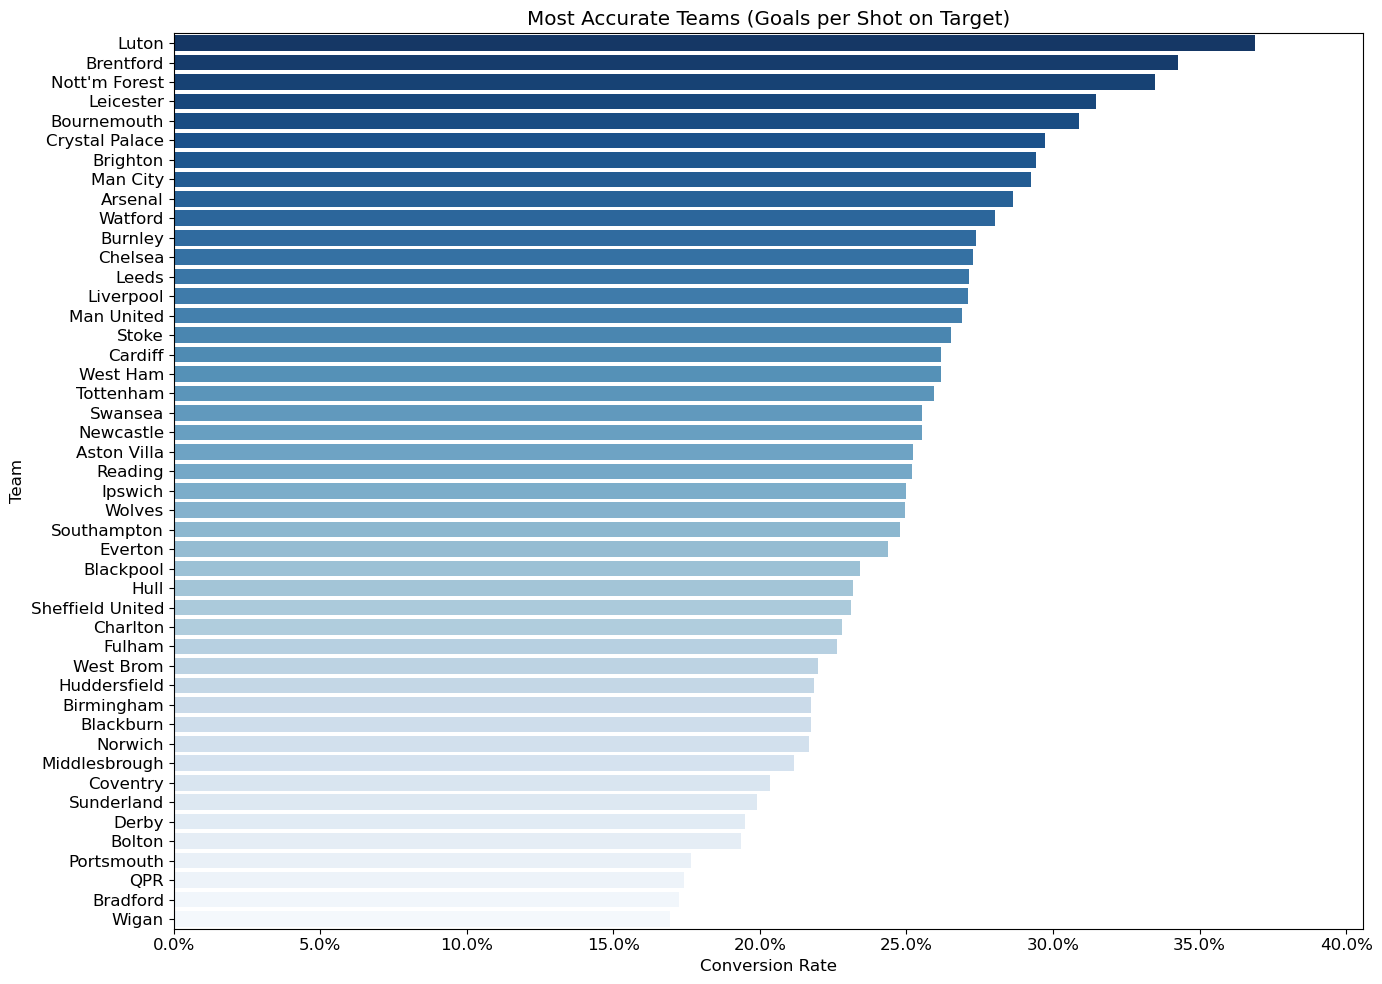

In [95]:
# Sort by accuracy
goal_on_shots = teamStatistics.sort_values(by="Goal/ST", ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(data=goal_on_shots, x="Goal/ST", y="Team", palette="Blues_r")

plt.title("Most Accurate Teams (Goals per Shot on Target)")
plt.xlabel("Conversion Rate")
plt.ylabel("Team")
plt.xlim(0, goal_on_shots["Goal/ST"].max() * 1.1)
plt.gca().xaxis.set_major_formatter(
    plt.FuncFormatter(lambda x, _: f"{x:.1%}")
)  # Percent format
plt.tight_layout()
plt.show()

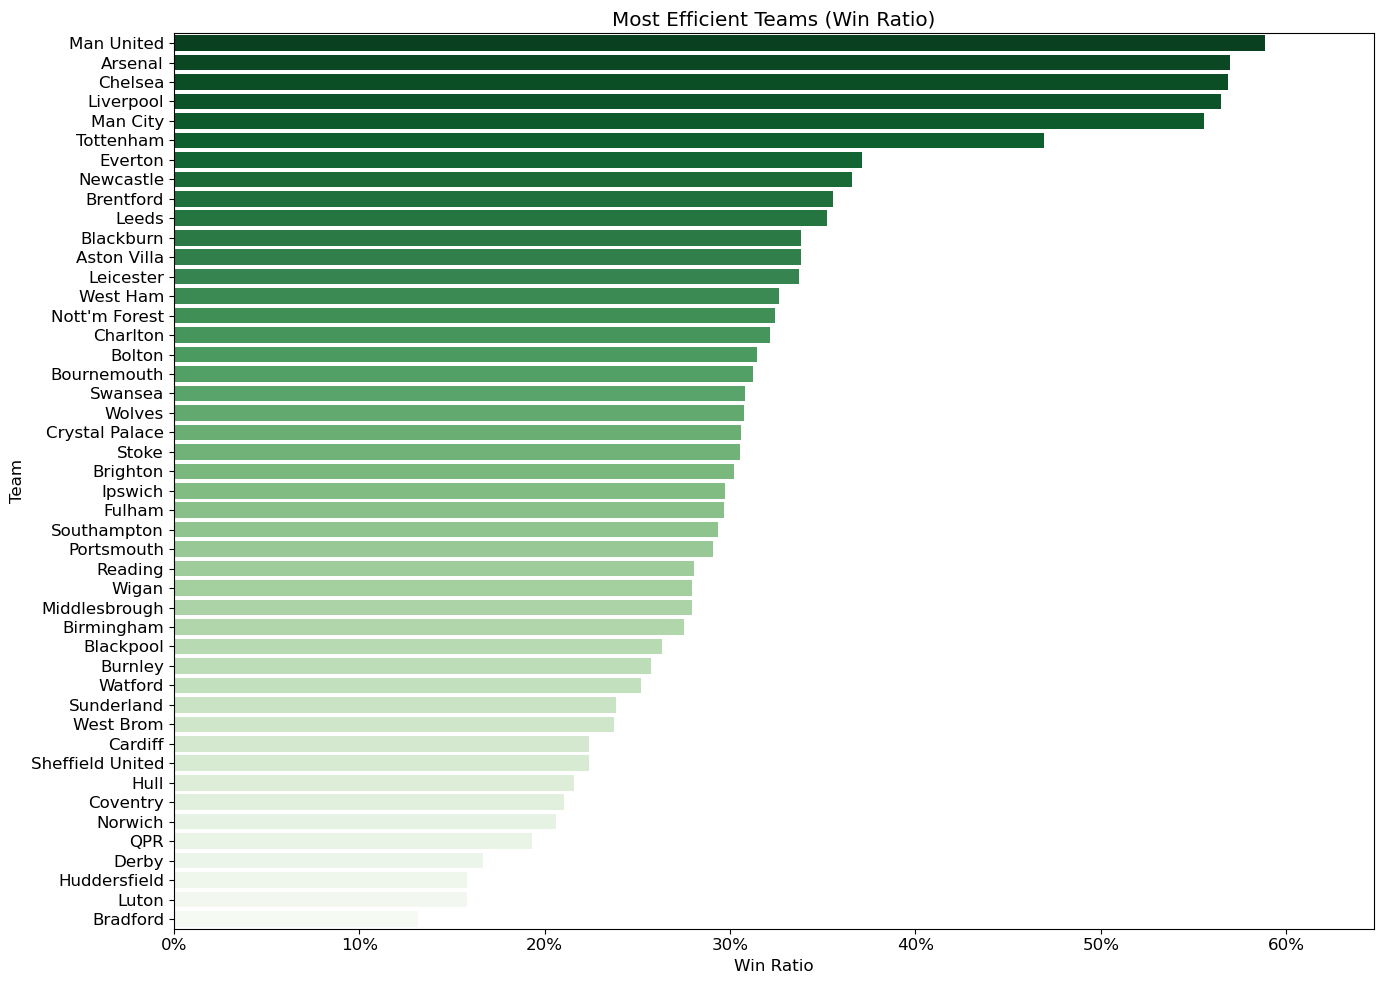

In [96]:
wins_on_games = teamStatistics.sort_values(by="Wins/Games", ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(data=wins_on_games, x="Wins/Games", y="Team", palette="Greens_r")

plt.title("Most Efficient Teams (Win Ratio)")
plt.xlabel("Win Ratio")
plt.ylabel("Team")
plt.xlim(0, wins_on_games["Wins/Games"].max() * 1.1)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0%}"))
plt.tight_layout()
plt.show()

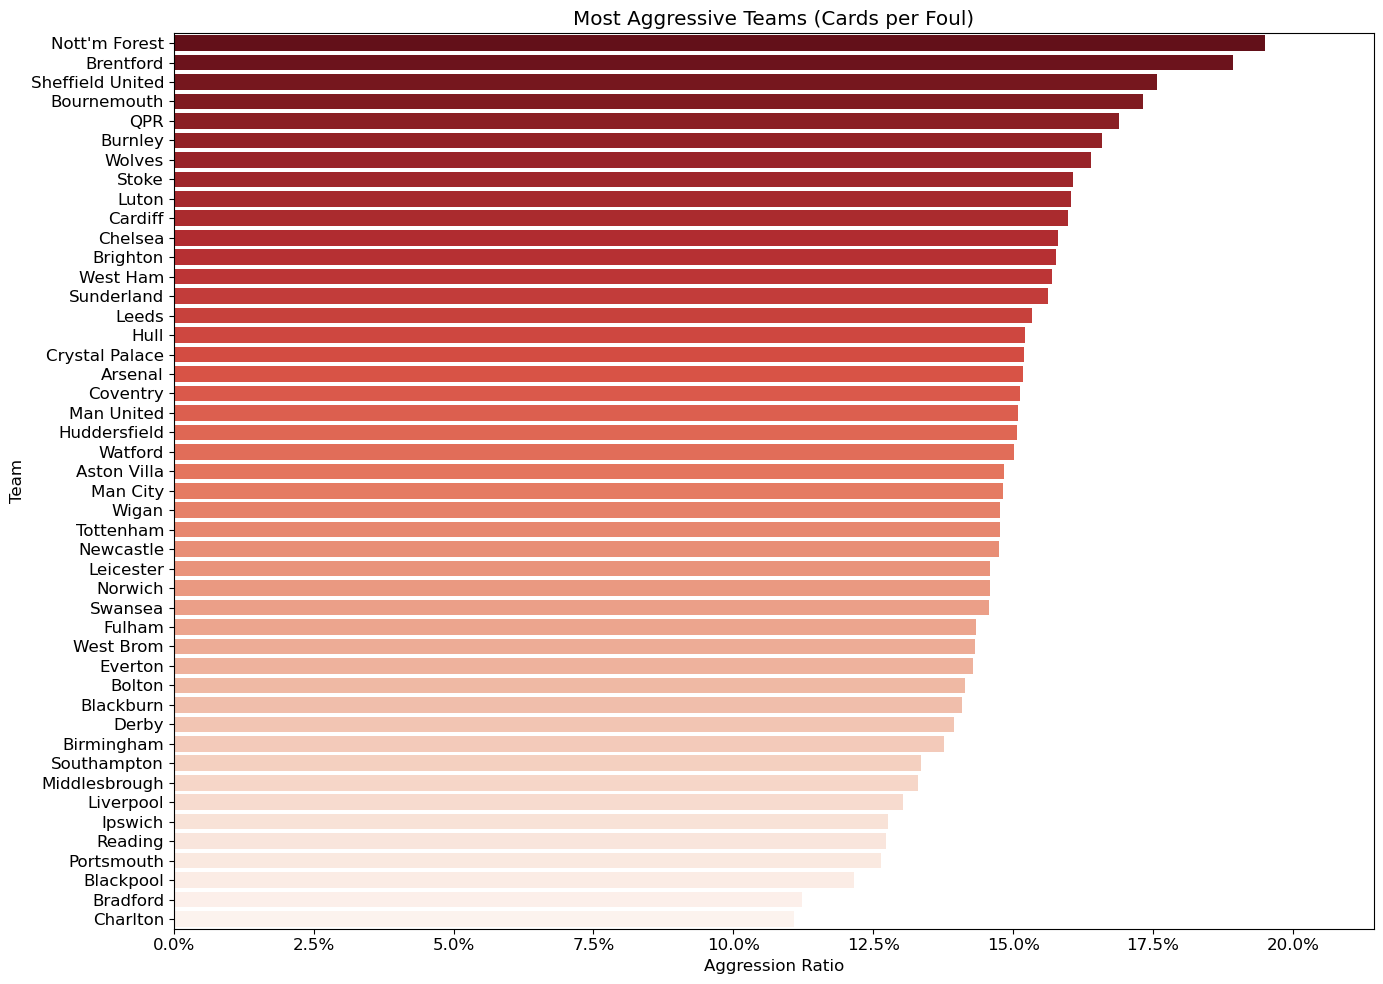

In [97]:
cards_on_fouls = teamStatistics.sort_values(by="Cards/Fouls", ascending=False)

plt.figure(figsize=(14,10))
sns.barplot(data=cards_on_fouls, x="Cards/Fouls", y="Team", palette="Reds_r")

plt.title("Most Aggressive Teams (Cards per Foul)")
plt.xlabel("Aggression Ratio")
plt.ylabel("Team")
plt.xlim(0, cards_on_fouls["Cards/Fouls"].max() * 1.1)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.1%}"))
plt.tight_layout()
plt.show()